<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/c2w3_Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.3.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [68]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb

In [69]:
# Download and assign the data set using load_data()

(train_x, train_y), (test_x, test_y) = imdb.load_data()

#### Inspect the dataset

In [70]:
# Inspect the type of the data

type(train_x)

numpy.ndarray

In [71]:
# Inspect the shape of the data
train_x.shape


(25000,)

In [72]:
# Display the first dataset element input
# Notice encoding
train_x[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [73]:
# Display the first dataset element output
#0 is negative and 1 is positive
train_y[1]


0

#### Load dataset with different options

In [74]:
# Load the dataset with defaults


# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words



In [ ]:
# Ignore the top 10 most frequent words using skip_top



In [ ]:
# Limit the sequence lengths to 500 using maxlen



In [ ]:
 # Use '1' as the character that indicates the start of a sequence

 

#### Explore the dataset word index

In [ ]:
# Load the imdb word index using get_word_index()



In [ ]:
# View the word index as a dictionary,
# accounting for index_from.



In [ ]:
# Retrieve a specific word's index



In [ ]:
# View an input sentence



In [ ]:
# Get the sentiment value



---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [ ]:
# Load the imdb data set



#### Preprocess the data with padding

In [ ]:
# Inspect the input data shape



In [ ]:
# Pad the inputs to the maximum length using maxlen



In [ ]:
# Inspect the output data shape



#### Create a Masking layer

In [ ]:
# Import numpy 



In [ ]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims



In [ ]:
# Create a Masking layer 



In [ ]:
# Pass tf_x_train to it



In [ ]:
# Look at the dataset



In [ ]:
# Look at the ._keras_mask for the dataset



***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [2]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)


In [3]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [2], [2], [100]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.03261773,  0.03671161,  0.03822717, -0.00078229,
           0.00788783, -0.04101598,  0.04173673,  0.04240983,
          -0.00402758,  0.01387415,  0.01946333, -0.02427261,
           0.04751876,  0.00090977, -0.02835362,  0.04698539]],

        [[ 0.02998238, -0.00787298,  0.01418648, -0.03233584,
           0.04878989,  0.03174653,  0.02430158,  0.02608855,
          -0.03212865,  0.03020689,  0.00328124,  0.01477876,
          -0.00332509, -0.00816443,  0.04400108, -0.01533819]],

        [[ 0.02998238, -0.00787298,  0.01418648, -0.03233584,
           0.04878989,  0.03174653,  0.02430158,  0.02608855,
          -0.03212865,  0.03020689,  0.00328124,  0.01477876,
          -0.00332509, -0.00816443,  0.04400108, -0.01533819]],

        [[ 0.01119211,  0.02646618, -0.03435246, -0.04251835,
          -0.01735493, -0.00860409,  0.0354691 ,  0.04807849,
          -0.00806133, -0.02030042,  0.02435008,  0.04942271,
      

In [4]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0]


array([[-0.03261773,  0.03671161,  0.03822717, ...,  0.00090977,
        -0.02835362,  0.04698539],
       [-0.04961604,  0.02727539,  0.02467841, ...,  0.03441742,
        -0.01977718, -0.01774703],
       [ 0.02998238, -0.00787298,  0.01418648, ..., -0.00816443,
         0.04400108, -0.01533819],
       ...,
       [ 0.03576258,  0.01729606, -0.04813025, ...,  0.01024995,
         0.0275839 ,  0.0296233 ],
       [ 0.02319286,  0.00934   ,  0.01774151, ..., -0.03402789,
        -0.02453952,  0.02783315],
       [ 0.00325052,  0.04170236,  0.04469451, ...,  0.03105931,
        -0.0297412 , -0.01920227]], dtype=float32)

In [5]:
embedding_layer.get_weights()

[array([[-0.03261773,  0.03671161,  0.03822717, ...,  0.00090977,
         -0.02835362,  0.04698539],
        [-0.04961604,  0.02727539,  0.02467841, ...,  0.03441742,
         -0.01977718, -0.01774703],
        [ 0.02998238, -0.00787298,  0.01418648, ..., -0.00816443,
          0.04400108, -0.01533819],
        ...,
        [ 0.03576258,  0.01729606, -0.04813025, ...,  0.01024995,
          0.0275839 ,  0.0296233 ],
        [ 0.02319286,  0.00934   ,  0.01774151, ..., -0.03402789,
         -0.02453952,  0.02783315],
        [ 0.00325052,  0.04170236,  0.04469451, ...,  0.03105931,
         -0.0297412 , -0.01920227]], dtype=float32)]

In [6]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][2,:]


array([ 0.02998238, -0.00787298,  0.01418648, -0.03233584,  0.04878989,
        0.03174653,  0.02430158,  0.02608855, -0.03212865,  0.03020689,
        0.00328124,  0.01477876, -0.00332509, -0.00816443,  0.04400108,
       -0.01533819], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [7]:
# Create a layer that uses the mask_zero kwarg
masked_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)


In [8]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_embeddings = masked_embedding_layer(sequence_of_indices)
masked_sequence_embeddings._keras_mask


<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

In [9]:
masked_sequence_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.02847311,  0.00939101, -0.02006594,  0.03662881,
           0.04374046, -0.03534802,  0.04103712,  0.02023622,
          -0.04171509, -0.04477927, -0.00804372, -0.03601611,
           0.03954199, -0.01471632,  0.04198882, -0.03362484]],

        [[ 0.03720322,  0.04432244,  0.04930122, -0.00686166,
           0.03350601,  0.02163563,  0.0467203 ,  0.00195838,
          -0.00959501, -0.03571083, -0.03410193, -0.03147761,
           0.0016081 ,  0.02445113, -0.03660549, -0.02398157]],

        [[ 0.03720322,  0.04432244,  0.04930122, -0.00686166,
           0.03350601,  0.02163563,  0.0467203 ,  0.00195838,
          -0.00959501, -0.03571083, -0.03410193, -0.03147761,
           0.0016081 ,  0.02445113, -0.03660549, -0.02398157]],

        [[ 0.003774  , -0.00511186,  0.00219036,  0.01250975,
          -0.04643184,  0.03526714, -0.01526319,  0.02361904,
           0.03490086, -0.0311794 , -0.00700527,  0.03716655,
      

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [11]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [12]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17465344/17464789 [==============================] - 0s 0us/step


In [13]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [14]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [15]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}

In [16]:
# View the first dataset example sentence

s=''
s=[s+inv_imdb_word_index[index] for index in x_train[100] if index>2]
print(s)

['i', 'am', 'a', 'great', 'fan', 'of', 'david', 'lynch', 'and', 'have', 'everything', 'that', "he's", 'made', 'on', 'dvd', 'except', 'for', 'hotel', 'room', 'the', '2', 'hour', 'twin', 'peaks', 'movie', 'so', 'when', 'i', 'found', 'out', 'about', 'this', 'i', 'immediately', 'grabbed', 'it', 'and', 'and', 'what', 'is', 'this', "it's", 'a', 'bunch', 'of', 'drawn', 'black', 'and', 'white', 'cartoons', 'that', 'are', 'loud', 'and', 'foul', 'mouthed', 'and', 'unfunny', 'maybe', 'i', "don't", 'know', "what's", 'good', 'but', 'maybe', 'this', 'is', 'just', 'a', 'bunch', 'of', 'crap', 'that', 'was', 'on', 'the', 'public', 'under', 'the', 'name', 'of', 'david', 'lynch', 'to', 'make', 'a', 'few', 'bucks', 'too', 'let', 'me', 'make', 'it', 'clear', 'that', 'i', "didn't", 'care', 'about', 'the', 'foul', 'language', 'part', 'but', 'had', 'to', 'keep', 'the', 'sound', 'because', 'my', 'neighbors', 'might', 'have', 'all', 'in', 'all', 'this', 'is', 'a', 'highly', 'disappointing', 'release', 'and', 'm

#### Build an Embedding layer into a model

In [17]:
# Get the maximum token value
max_index_value = max(imdb_word_index.values())
max_index_value

10000

In [18]:
# Specify an embedding dimension
embedding_dim = 16

In [20]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Functional API refresher: use the Model to build the same model

input_layer = tf.keras.Input((None,))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim)(input_layer)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs= input_layer, outputs = output_layer)

In [33]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [34]:
# Compile the model with a binary cross-entropy loss

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model using .fit(), savng its history
history=model.fit(x=x_train, y=y_train, batch_size=32, epochs=3, validation_data=(x_test, y_test), validation_steps=20)


Epoch 1/3
782/782 [==============================] - 6s 7ms/step - loss: 0.6893 - accuracy: 0.5748 - val_loss: 0.6831 - val_accuracy: 0.6969
Epoch 2/3
782/782 [==============================] - 6s 7ms/step - loss: 0.6738 - accuracy: 0.6826 - val_loss: 0.6602 - val_accuracy: 0.7484
Epoch 3/3
782/782 [==============================] - 6s 7ms/step - loss: 0.6457 - accuracy: 0.7284 - val_loss: 0.6261 - val_accuracy: 0.7500


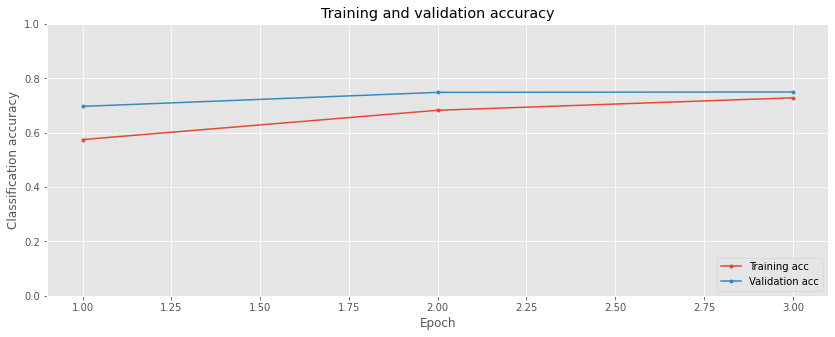

In [36]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [42]:
# Retrieve the embedding layer's weights from the trained model
weights = model.layers[1].get_weights()[0]


In [43]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('/content/drive/MyDrive/temp', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('/content/drive/MyDrive/temp', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

In [88]:
s=''
s=[s+inv_imdb_word_index[index] for index in x_train[1] if index>2]
print(s)
print(y_train[1])
predict = model.predict(x_train)
print(predict[1])

['big', 'hair', 'big', 'boobs', 'bad', 'music', 'and', 'a', 'giant', 'safety', 'pin', 'these', 'are', 'the', 'words', 'to', 'best', 'describe', 'this', 'terrible', 'movie', 'i', 'love', 'cheesy', 'horror', 'movies', 'and', "i've", 'seen', 'hundreds', 'but', 'this', 'had', 'got', 'to', 'be', 'on', 'of', 'the', 'worst', 'ever', 'made', 'the', 'plot', 'is', 'paper', 'thin', 'and', 'ridiculous', 'the', 'acting', 'is', 'an', 'abomination', 'the', 'script', 'is', 'completely', 'laughable', 'the', 'best', 'is', 'the', 'end', 'showdown', 'with', 'the', 'cop', 'and', 'how', 'he', 'worked', 'out', 'who', 'the', 'killer', 'is', "it's", 'just', 'so', 'damn', 'terribly', 'written', 'the', 'clothes', 'are', 'sickening', 'and', 'funny', 'in', 'equal', 'the', 'hair', 'is', 'big', 'lots', 'of', 'boobs', 'men', 'wear', 'those', 'cut', 'shirts', 'that', 'show', 'off', 'their', 'sickening', 'that', 'men', 'actually', 'wore', 'them', 'and', 'the', 'music', 'is', 'just', 'trash', 'that', 'plays', 'over', 'a

In [86]:
predict.shape

(2494, 1)

In [91]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [147]:
examples = [
  "The movie was great",
  "The movie was okay",
  "The movie was terrible"
]
'''
tokenizer = Tokenizer(num_words=None, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token='<UNK>',
                      document_count=0)
tokenizer.fit_on_texts(examples)
examples_seq = tokenizer.texts_to_sequences(examples)
'''
print(len(examples))
example_tokens=[]
for example in examples:
    words = example.split()
    print(words)
    word_token = [imdb_word_index[word.lower()] for word in words]
    print(word_token)
    example_tokens.append(word_token)
print(example_tokens)

examples_token_padded = tf.keras.preprocessing.sequence.pad_sequences(example_tokens,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
print(examples_token_padded)
predict = model.predict(examples_token_padded)
print(predict)

3
['The', 'movie', 'was', 'great']
[3, 19, 15, 86]
['The', 'movie', 'was', 'okay']
[3, 19, 15, 863]
['The', 'movie', 'was', 'terrible']
[3, 19, 15, 393]
[[3, 19, 15, 86], [3, 19, 15, 863], [3, 19, 15, 393]]
[[  3  19  15  86]
 [  3  19  15 863]
 [  3  19  15 393]]
[[8.7100554e-01]
 [1.3145585e-06]
 [5.0744648e-09]]


In [119]:
imdb_word_index['the']

3

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [26]:
# Create a SimpleRNN layer and test it
from tensorflow.keras.layers import SimpleRNN

simple_rnn = SimpleRNN(16)

In [28]:
# Note that only the final cell output is returned

#test_seq = tf.constant([[[1., 2.], [2., 2.], [3.,.2]]])
test_seq = tf.constant([[[1., 2.], [2., 2.], [3.,.2]],
                        [[21., 22.], [22., 22.], [23.,.22]]])
layer_output = simple_rnn(test_seq)
layer_output

<tf.Tensor: shape=(2, 16), dtype=float32, numpy=
array([[ 0.9590956 , -0.97037417, -0.64286375, -0.64176714, -0.89045393,
        -0.9897425 , -0.54341197,  0.6857618 , -0.88267404,  0.9677457 ,
         0.05419197,  0.9628161 ,  0.51834893,  0.8406977 , -0.9382623 ,
        -0.76582867],
       [ 1.        , -1.        , -0.99614596, -0.99999994, -0.99701697,
        -1.        , -1.        ,  1.        , -1.        ,  1.        ,
         0.9997948 ,  1.        ,  0.9998997 ,  1.        , -1.        ,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [29]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [30]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=300)


17465344/17464789 [==============================] - 0s 0us/step


In [31]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [32]:
# Get the word index using get_imdb_word_index()

imdb_word_index= get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [36]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values())
print(max_index_value)

embedding_dim = 16


10000


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [37]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.
model = Sequential([
                    Embedding(input_dim=max_index_value, output_dim=embedding_dim),
                    LSTM(64, activation='tanh'),
                    Dense(1, activation='sigmoid')
])


#### Compile and fit the model

In [38]:
# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 180,801
Trainable params: 180,801
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
596/596 [==============================] - 9s 15ms/step - loss: 0.4541 - accuracy: 0.7738
Epoch 2/3
596/596 [==============================] - 9s 15ms/step - loss: 0.2604 - accuracy: 0.9001
Epoch 3/3
596/596 [==============================] - 9s 15ms/step - loss: 0.2106 - accuracy: 0.9227


#### Plot learning curves

In [41]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored

#### Make predictions with the model

In [62]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index = {index:word for word, index in imdb_word_index.items() }
#print(inv_imdb_word_index)
s=''
s=[s+inv_imdb_word_index[token] for token in x_test[3] if token>2]
print(s)

['like', 'some', 'other', 'people', 'wrote', "i'm", 'a', 'die', 'hard', 'mario', 'fan', 'and', 'i', 'loved', 'this', 'game', 'br', 'br', 'this', 'game', 'starts', 'slightly', 'boring', 'but', 'trust', 'me', "it's", 'worth', 'it', 'as', 'soon', 'as', 'you', 'start', 'your', 'hooked', 'the', 'levels', 'are', 'fun', 'and', 'they', 'will', 'hook', 'you', 'your', 'mind', 'turns', 'to', "i'm", 'not', 'kidding', 'this', 'game', 'is', 'also', 'and', 'is', 'beautifully', 'done', 'br', 'br', 'to', 'keep', 'this', 'spoiler', 'free', 'i', 'have', 'to', 'keep', 'my', 'mouth', 'shut', 'about', 'details', 'but', 'please', 'try', 'this', 'game', "it'll", 'be', 'worth', 'it', 'br', 'br', 'story', '9', '9', 'action', '10', '1', "it's", 'that', 'good', '10', 'attention', '10', 'average', '10']


In [56]:
#x_test[0]
inv_imdb_word_index[9]

'br'

In [63]:
# Get the model prediction using model.predict()
predict = model.predict(x_test[None, 3, :])
print(predict)

[[0.9966317]]


In [64]:
# Get the corresponding label
print(y_test[3])


1


---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset



In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()



#### Build stacked and bidirectional recurrent models

In [ ]:
# Get the maximum index value and specify an embedding dimension



In [ ]:
# Using Sequential, build a stacked LSTM model via return_sequences=True



In [ ]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'



In [ ]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer



#### Compile and fit the model

In [ ]:
# Compile the model



In [ ]:
# Train the model, saving its history



In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);